# Датасет Саши (с использованием классов)

In [48]:
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib
import pickle

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [49]:
from clintraj_qi import *
from clintraj_optiscale import *
from clintraj_eltree import *
from clintraj_util import *
import scipy.stats

In [50]:
def save_obj(obj, name):
    os.makedirs("obj/PTB_XL/With Classes/Unhealthy", exist_ok=True)
    with open('obj/PTB_XL/With Classes/Unhealthy/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('obj/PTB_XL/With Classes/Unhealthy/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [51]:
dataset = pd.read_csv('../datasets/PTB_XL.csv', sep=',')
dataset

,ecg_id,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,...,NORM,MI,STTC,CD,HYP,NORM_PROB,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB
0,1,1,56.0,NaN,63.0,88.854167,10.836725,83.796296,2.678984,163.201852,...,1,0,0,0,0,100,0,0,0,0
1,2,0,19.0,NaN,70.0,87.304365,12.881166,84.380952,2.950844,209.904762,...,1,0,0,0,0,80,0,0,0,0
2,3,1,37.0,NaN,69.0,82.310648,13.188344,81.148148,4.022570,183.480808,...,1,0,0,0,0,100,0,0,0,0
3,4,0,24.0,NaN,82.0,88.672703,12.592751,97.016667,2.889637,179.616667,...,1,0,0,0,0,100,0,0,0,0
4,5,1,19.0,NaN,70.0,92.718519,10.080940,86.388889,2.561185,183.248148,...,1,0,0,0,0,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,1,67.0,NaN,NaN,83.363930,14.132517,92.419048,11.880983,108.567796,...,0,0,1,0,0,0,0,100,0,0
21833,21834,0,93.0,NaN,NaN,100.100000,7.918754,88.633333,2.576820,196.740741,...,1,0,0,0,0,100,0,0,0,0
21834,21835,1,59.0,NaN,NaN,89.650000,10.266897,90.791667,3.243583,157.833333,...,0,0,1,0,0,0,0,50,0,0
21835,21836,1,64.0,NaN,NaN,98.320106,10.089180,86.100000,3.770942,177.083333,...,1,0,0,0,0,100,0,0,0,0


In [52]:
for col in dataset:
    print(f'{col}: {dataset[col].isna().sum()} NaN vals')

ecg_id: 0 NaN vals
SEX: 0 NaN vals
AGE: 89 NaN vals
HEIGHT: 14854 NaN vals
WEIGHT: 12408 NaN vals
ALL_C_P_AV: 0 NaN vals
ALL_C_P_DEV: 0 NaN vals
ALL_C_QRS_AV: 0 NaN vals
ALL_C_QRS_DEV: 0 NaN vals
ALL_C_T_AV: 0 NaN vals
ALL_C_T_DEV: 0 NaN vals
ALL_C_PR_INT_AV: 0 NaN vals
ALL_C_PR_INT_DEV: 0 NaN vals
ALL_C_PR_SEGM_AV: 0 NaN vals
ALL_C_PR_SEGM_DEV: 0 NaN vals
ALL_C_ST_SEGM_AV: 0 NaN vals
ALL_C_ST_SEGM_DEV: 0 NaN vals
ALL_C_QT_INT_AV: 0 NaN vals
ALL_C_QT_INT_DEV: 0 NaN vals
I_C_P_AV: 0 NaN vals
I_C_P_DEV: 0 NaN vals
I_C_QRS_AV: 0 NaN vals
I_C_QRS_DEV: 0 NaN vals
I_C_T_AV: 0 NaN vals
I_C_T_DEV: 0 NaN vals
I_C_PR_INT_AV: 0 NaN vals
I_C_PR_INT_DEV: 0 NaN vals
I_C_PR_SEGM_AV: 0 NaN vals
I_C_PR_SEGM_DEV: 0 NaN vals
I_C_ST_SEGM_AV: 0 NaN vals
I_C_ST_SEGM_DEV: 0 NaN vals
I_C_QT_INT_AV: 0 NaN vals
I_C_QT_INT_DEV: 0 NaN vals
II_C_P_AV: 0 NaN vals
II_C_P_DEV: 0 NaN vals
II_C_QRS_AV: 0 NaN vals
II_C_QRS_DEV: 0 NaN vals
II_C_T_AV: 0 NaN vals
II_C_T_DEV: 0 NaN vals
II_C_PR_INT_AV: 0 NaN vals
II_C_PR_IN

In [53]:
quantify_nans(dataset)

Missing values 27351 (0.6390342921067313%)
Number of complete rows: 6680 (30.590282547969043%)


Уберем строчки без диагноза

In [56]:
list_to_drop = []
for i in range(len(dataset)):
    if (dataset.at[i, 'NORM'] + dataset.at[i, 'MI'] + dataset.at[i, 'STTC'] + dataset.at[i, 'CD'] + dataset.at[i, 'HYP'] == 0):
        list_to_drop.append(i)
        
dataset_dropped = dataset.drop(dataset.index[list_to_drop])
dataset_dropped = dataset_dropped.reset_index(drop=True)
dataset_dropped

,ecg_id,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,...,NORM,MI,STTC,CD,HYP,NORM_PROB,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB
0,1,1,56.0,NaN,63.0,88.854167,10.836725,83.796296,2.678984,163.201852,...,1,0,0,0,0,100,0,0,0,0
1,2,0,19.0,NaN,70.0,87.304365,12.881166,84.380952,2.950844,209.904762,...,1,0,0,0,0,80,0,0,0,0
2,3,1,37.0,NaN,69.0,82.310648,13.188344,81.148148,4.022570,183.480808,...,1,0,0,0,0,100,0,0,0,0
3,4,0,24.0,NaN,82.0,88.672703,12.592751,97.016667,2.889637,179.616667,...,1,0,0,0,0,100,0,0,0,0
4,5,1,19.0,NaN,70.0,92.718519,10.080940,86.388889,2.561185,183.248148,...,1,0,0,0,0,100,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21425,21833,1,67.0,NaN,NaN,83.363930,14.132517,92.419048,11.880983,108.567796,...,0,0,1,0,0,0,0,100,0,0
21426,21834,0,93.0,NaN,NaN,100.100000,7.918754,88.633333,2.576820,196.740741,...,1,0,0,0,0,100,0,0,0,0
21427,21835,1,59.0,NaN,NaN,89.650000,10.266897,90.791667,3.243583,157.833333,...,0,0,1,0,0,0,0,50,0,0
21428,21836,1,64.0,NaN,NaN,98.320106,10.089180,86.100000,3.770942,177.083333,...,1,0,0,0,0,100,0,0,0,0


Разобьем строчки с множественными диагнозами по принципу one-hot encoding

In [57]:
multi_ixs = dataset_dropped[(dataset_dropped['NORM'] + dataset_dropped['MI'] + dataset_dropped['STTC'] + dataset_dropped['CD'] + dataset_dropped['HYP'] > 1)].index
multi_ixs

rows = []
for ix in multi_ixs:
    for col in ['NORM', 'MI', 'STTC', 'CD', 'HYP']:
        if (dataset_dropped.at[ix, col] == 1):
            row = dataset_dropped.iloc[ix].copy()
            for tmp_col in ['NORM', 'MI', 'STTC', 'CD', 'HYP']:
                if col != tmp_col:
                    row[tmp_col] = 0
                    row[tmp_col + '_PROB'] = 0
            rows.append(row)

dataset_dropped = dataset_dropped.append(rows).reset_index(drop=True)
dataset_dropped = dataset_dropped.drop(multi_ixs).reset_index(drop=True)

In [58]:
dataset_dropped = dataset_dropped.drop(dataset_dropped[(dataset_dropped['NORM'] == 1)].index).drop(['NORM', 'NORM_PROB'], axis=1).reset_index(drop=True)
dataset_dropped

,ecg_id,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,...,V6_C_QT_INT_AV,V6_C_QT_INT_DEV,MI,STTC,CD,HYP,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB
0,8.0,0.0,48.0,NaN,95.0,100.316667,12.131639,85.550000,2.744085,178.900000,...,364.600000,2.690725,1.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0
1,22.0,1.0,17.0,NaN,53.0,88.981818,8.289819,85.393939,1.674637,164.712121,...,358.363636,5.448481,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0
2,26.0,0.0,56.0,NaN,NaN,90.082492,15.961563,97.666667,3.079953,152.022436,...,398.000000,14.877276,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0
3,28.0,0.0,56.0,NaN,NaN,83.306870,18.644523,90.172619,5.383836,124.888889,...,373.833333,22.678306,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0
4,30.0,0.0,25.0,NaN,83.0,104.335648,8.618019,112.518519,1.730862,212.740741,...,403.777778,3.456966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,21827.0,1.0,79.0,NaN,NaN,65.711111,10.065820,115.335185,19.436315,186.168981,...,434.222222,61.683381,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
18294,21827.0,1.0,79.0,NaN,NaN,65.711111,10.065820,115.335185,19.436315,186.168981,...,434.222222,61.683381,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0
18295,21828.0,1.0,79.0,NaN,NaN,64.097222,15.379986,110.725758,16.007926,184.752525,...,405.636364,34.921399,1.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0
18296,21828.0,1.0,79.0,NaN,NaN,64.097222,15.379986,110.725758,16.007926,184.752525,...,405.636364,34.921399,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0


In [18]:
X_data_raw = dataset_dropped.drop('ecg_id', axis=1)

## План

Построим кучу деревьев на основе:
1. Масштабирования: нормализации, стандартизации, оптимизации (если это так можно назвать),
2. 2D/3D.

## 1. Обработка датасета

### Нормализация и стандартизация

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', MinMaxScaler()),
                        ])

num_pipeline_std = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('mm_scaler', StandardScaler()),
                        ])

X_data_prep = num_pipeline.fit_transform(X_data_raw) 
X_data_prep_std = num_pipeline_std.fit_transform(X_data_raw) 
X_prep = pd.DataFrame(X_data_prep)
X_prep_std = pd.DataFrame(X_data_prep_std)

### Оптимизация

In [20]:

variable_types, binary, continuous, ordinal = detect_variable_type(dataset_dropped, 10, verbose=False)
dfq,replacement_info = quantify_dataframe_univariate(dataset_dropped, variable_types)
with open('temp.txt','w') as fid:
    fid.write(replacement_info)


"\nvariable_types, binary, continuous, ordinal = detect_variable_type(dataset_dropped, 10, verbose=False)\ndfq,replacement_info = quantify_dataframe_univariate(dataset_dropped, variable_types)\nwith open('temp.txt','w') as fid:\n    fid.write(replacement_info)\n"

In [21]:

dfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)
dequant_info = invert_quant_info(load_quantification_info('temp.txt'))
df_imputed = dequantify_table(dfq_imputed,dequant_info)
display(df_imputed)


"\ndfq_imputed = SVDcomplete_imputation_method(dfq, variable_types, verbose=True,num_components=-1)\ndequant_info = invert_quant_info(load_quantification_info('temp.txt'))\ndf_imputed = dequantify_table(dfq_imputed,dequant_info)\ndisplay(df_imputed)\n"

In [22]:

df = remove_constant_columns_from_dataframe(df_imputed)
variable_names = [str(s) for s in df.columns[1:]]
X = df[df.columns[1:]].to_numpy()
X_orig_opt = X
X_before_scaling = X.copy()
X_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)


'\ndf = remove_constant_columns_from_dataframe(df_imputed)\nvariable_names = [str(s) for s in df.columns[1:]]\nX = df[df.columns[1:]].to_numpy()\nX_orig_opt = X\nX_before_scaling = X.copy()\nX_opt, cik = optimal_scaling(X,variable_types,verbose=True,vmax=0.6)\n'

In [23]:

save_obj(df, "dataframe_opt")
save_obj(X_opt, "X_opt")
save_obj(cik, "cik")
save_obj(X_orig_opt, "X_orig_opt")
save_obj(X_before_scaling, "X_before_scaling")


'\nsave_obj(df, "dataframe_opt")\nsave_obj(X_opt, "X_opt")\nsave_obj(cik, "cik")\nsave_obj(X_orig_opt, "X_orig_opt")\nsave_obj(X_before_scaling, "X_before_scaling")\n'

In [24]:
X_opt = load_obj("X_opt")
cik = load_obj("cik")
X_orig_opt = load_obj("X_orig_opt")
X_before_scaling = load_obj("X_before_scaling")
dataframe_opt = load_obj("dataframe_opt")

## 2. Построение деревьев

In [25]:
import elpigraph
from elpigraph import computeElasticPrincipalTree

nnodes = 50
X_norm = X_prep.to_numpy()
X_std = X_prep_std.to_numpy()

In [26]:
def do_PCA(X):
    reduced_dimension = 12
    X_to_PCA = scipy.stats.zscore(X)
    pca = PCA(n_components=X_to_PCA.shape[1],svd_solver='full')
    Y = pca.fit_transform(X_to_PCA)
    v = pca.components_.T
    mean_val = np.mean(X_to_PCA,axis=0)
    return Y[:, 0:reduced_dimension], v, mean_val 

X_pca_norm, components_norm, mnval_norm = do_PCA(X_norm)
X_pca_std, components_std, mnval_std = do_PCA(X_std)
X_pca_opt, components_opt, mnval_opt = do_PCA(X_opt)

In [27]:
def create_extended_tree(X, nnodes):
    tree_elpi = computeElasticPrincipalTree(X, nnodes, alpha=0.01, Mu=0.1, Lambda=0.05, FinalEnergy='Penalized')[0]
    prune_the_tree(tree_elpi)
    tree_extended = ExtendLeaves_modified(X, tree_elpi, Mode = "QuantDists", ControlPar = .5, DoSA = False)
    return tree_extended

PTB_tree_norm = create_extended_tree(X_pca_norm, 50)
PTB_tree_std = create_extended_tree(X_pca_std, 50)
PTB_tree_opt = create_extended_tree(X_pca_opt, 50)


'\nPTB_tree_norm = create_extended_tree(X_pca_norm, 50)\nPTB_tree_std = create_extended_tree(X_pca_std, 50)\nPTB_tree_opt = create_extended_tree(X_pca_opt, 50)\n'

In [28]:

save_obj(PTB_tree_norm, "PTB_tree_norm")
save_obj(PTB_tree_std, "PTB_tree_std")
save_obj(PTB_tree_opt, "PTB_tree_opt")


'\nsave_obj(PTB_tree_norm, "PTB_tree_norm")\nsave_obj(PTB_tree_std, "PTB_tree_std")\nsave_obj(PTB_tree_opt, "PTB_tree_opt")\n'

In [29]:
tree_norm = load_obj("PTB_tree_norm")
tree_std = load_obj("PTB_tree_std")
tree_opt = load_obj("PTB_tree_opt")

In [30]:
variable_names = [str(s) for s in dataframe_opt.columns[1:]]
X_orig_imputer = SimpleImputer(strategy="median").fit_transform(X_data_raw)
X_classes_orig_imputer = pd.DataFrame(X_orig_imputer, columns=variable_names)
X_classes_orig_imputer['Class'] = classes
X_orig_imputer = X_classes_orig_imputer.to_numpy()
variable_names = [str(s) for s in X_classes_orig_imputer.columns[1:]]

NameError: name 'classes' is not defined

## 3. Визуализация деревьев

### Окраска ветвей деревьев

In [394]:
def tree_visualization(tree_elpi, X, X_orig, components_vec, mean_val):
    vec_labels_by_branches = partition_data_by_tree_branches(X, tree_elpi)

    partition, dists = elpigraph.src.core.PartitionData(X = X, NodePositions = tree_elpi['NodePositions'], 
                                                        SquaredX = np.sum(X**2,axis=1,keepdims=1),
                                                        MaxBlockSize = 100000000, TrimmingRadius = np.inf
                                                        )
    partition_by_node = np.zeros(len(partition))
    for i,p in enumerate(partition):
        partition_by_node[i] = p[0]

    variable_names = [str(s) for s in dataset.columns[1:]]
    visualize_eltree_with_data(tree_elpi, X, X_orig, components_vec, mean_val, 'k', variable_names,
                              Color_by_partitioning = True, visualize_partition = vec_labels_by_branches, add_color_bar=True)

In [362]:
figsize=(15, 12)

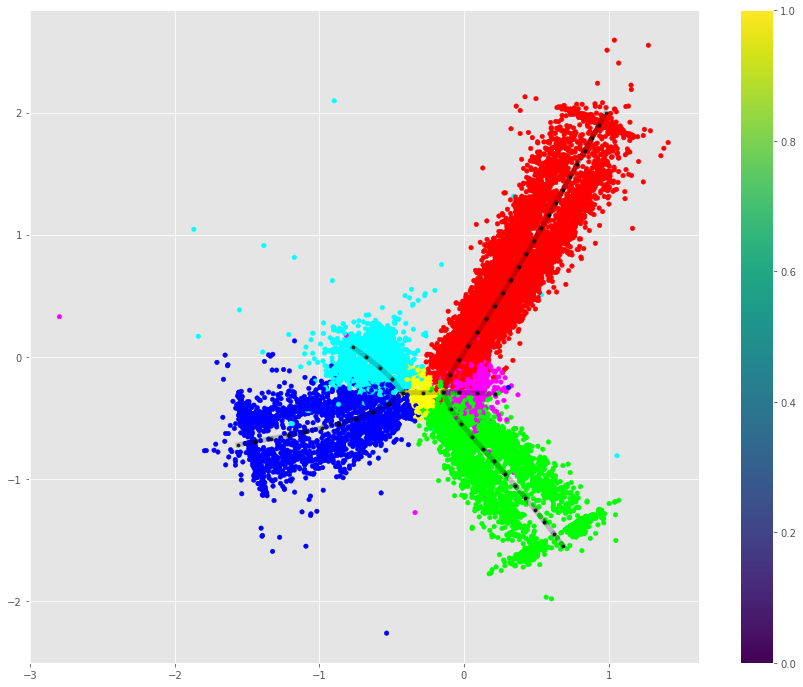

In [395]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm)
plt.show()

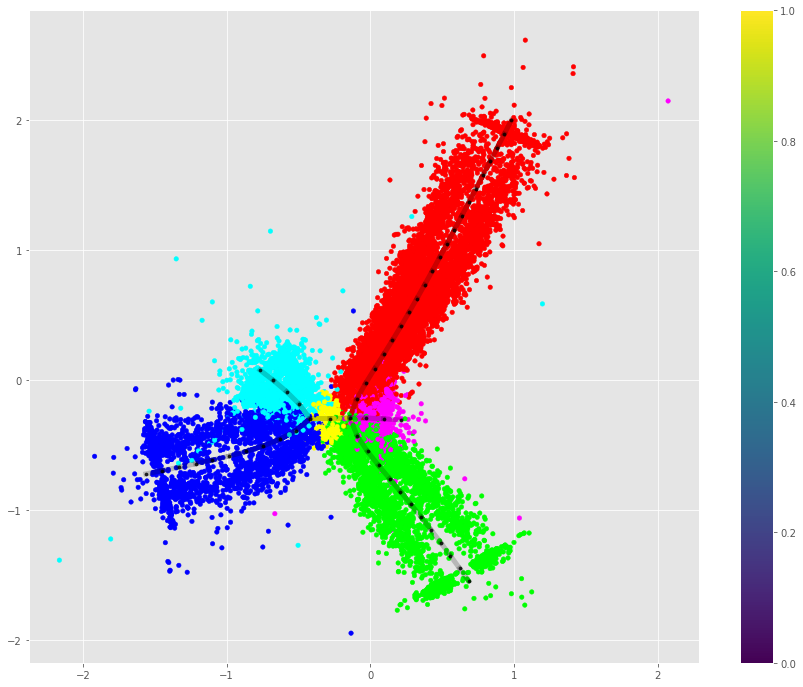

In [396]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std)
plt.show()

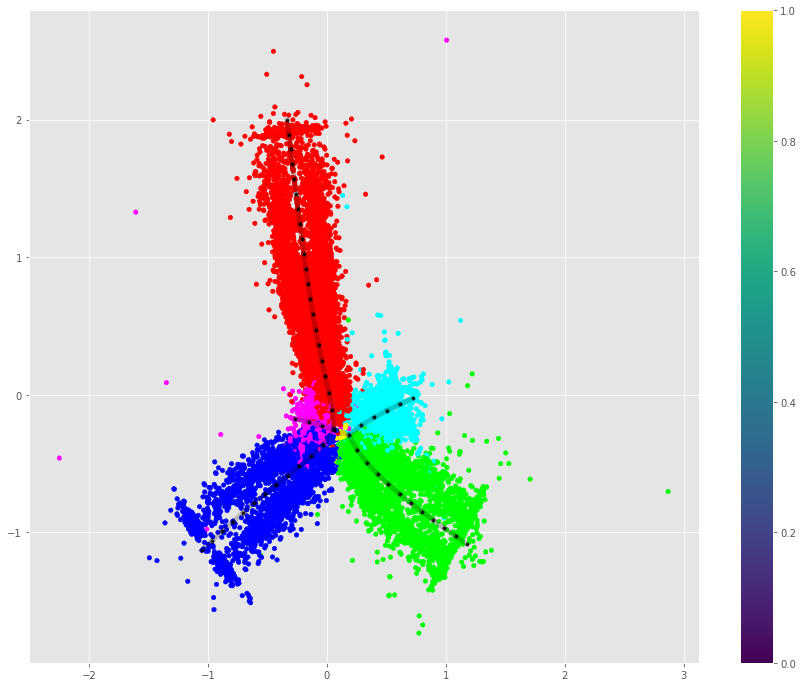

In [397]:
fig = plt.figure(figsize=figsize)
tree_visualization(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt)
plt.show()

### Визуализация атрибутов и исследование деревьев

#### Нормализация

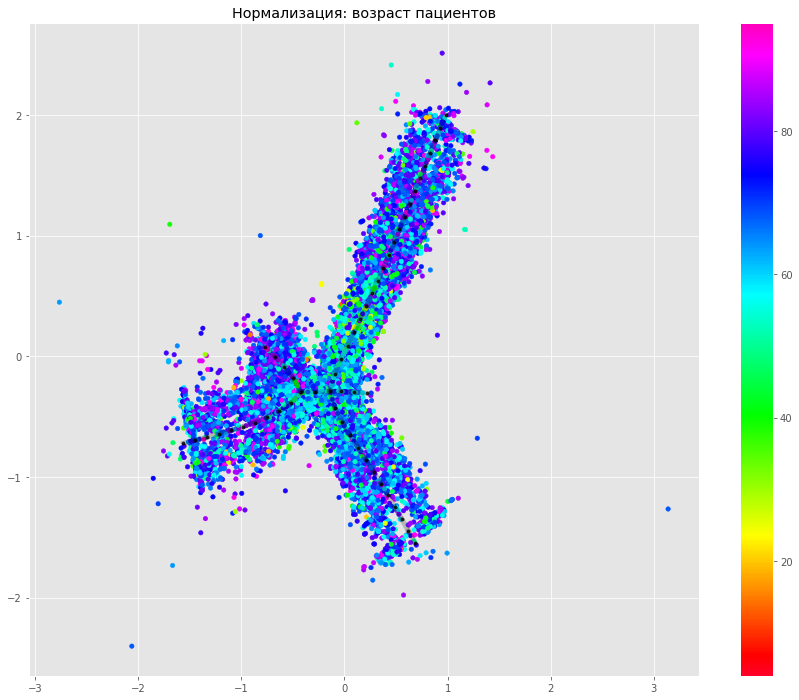

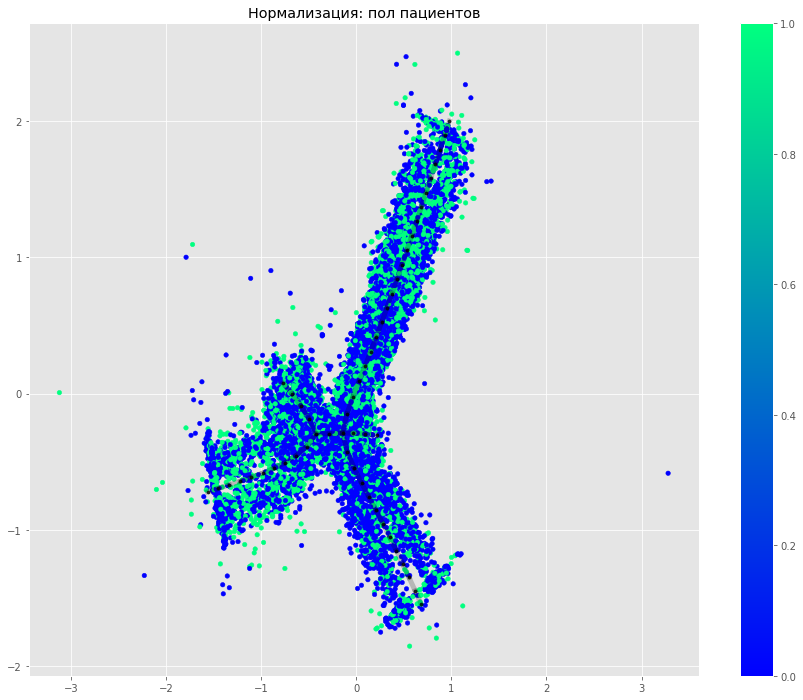

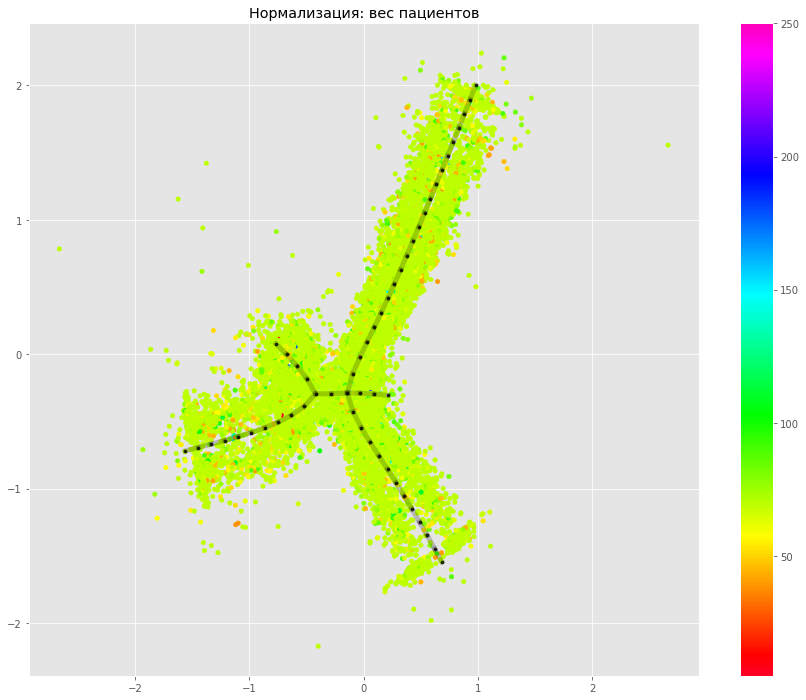

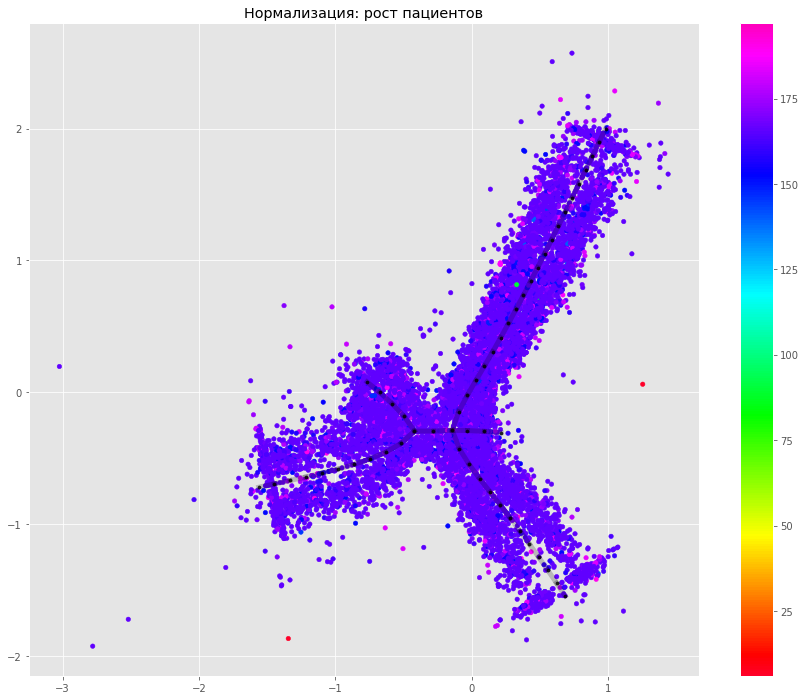

In [366]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Нормализация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_orig_imputer, components_norm, mnval_norm, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Нормализация: рост пациентов")
plt.show()

#### Стандартизация

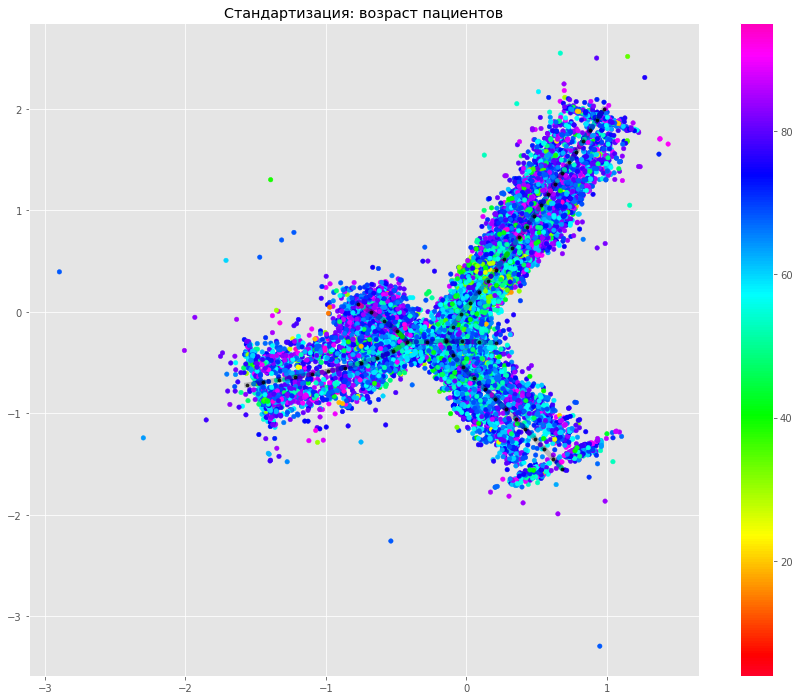

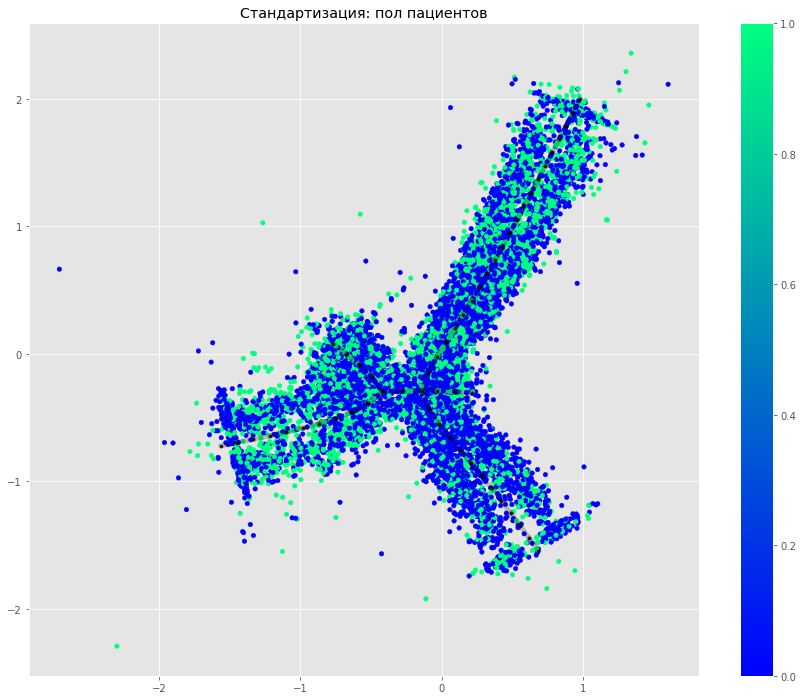

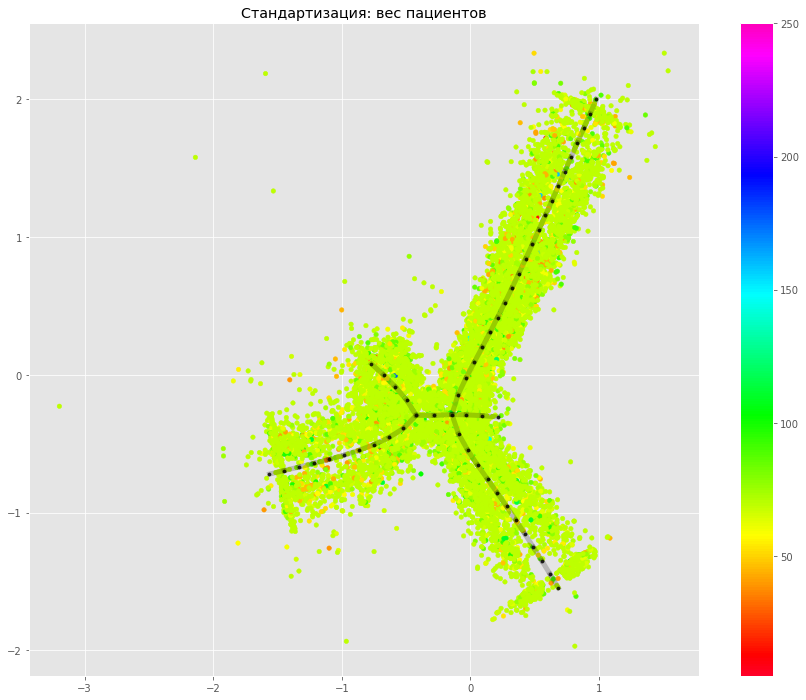

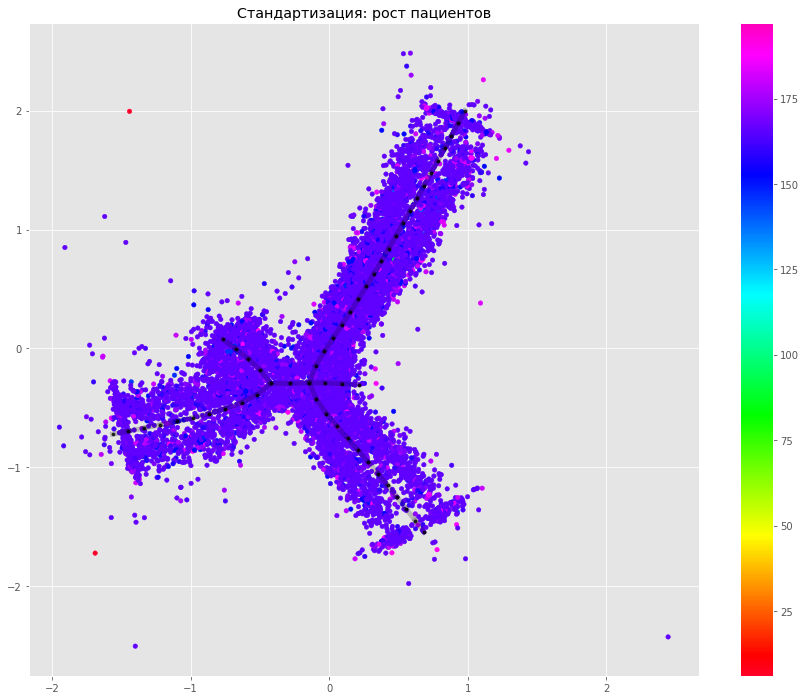

In [367]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Стандартизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_orig_imputer, components_std, mnval_std, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: рост пациентов")
plt.show()

#### Оптимизация

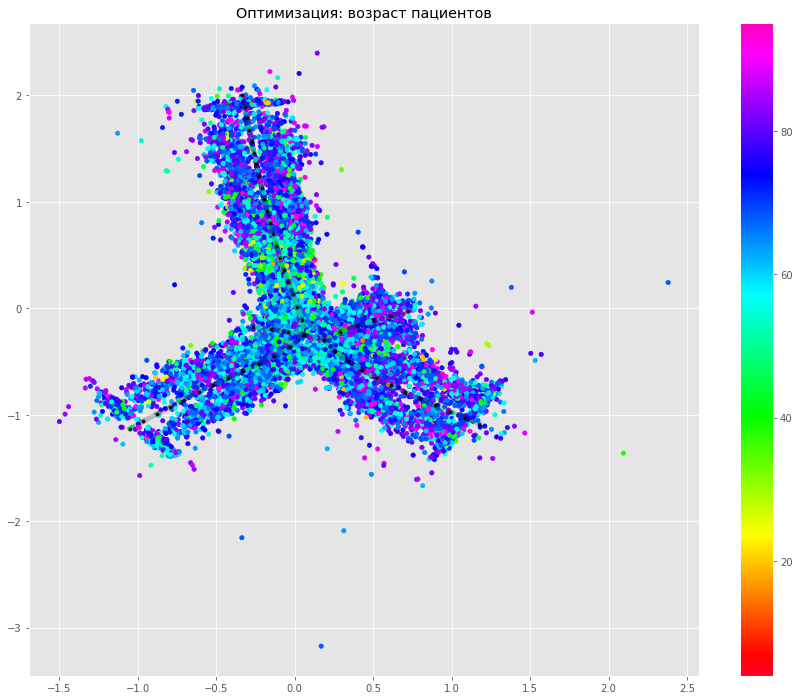

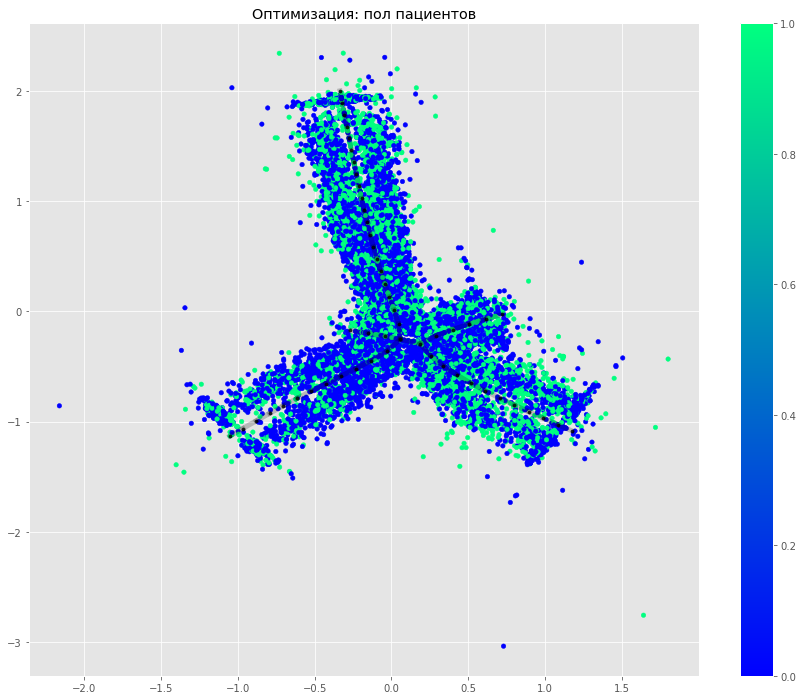

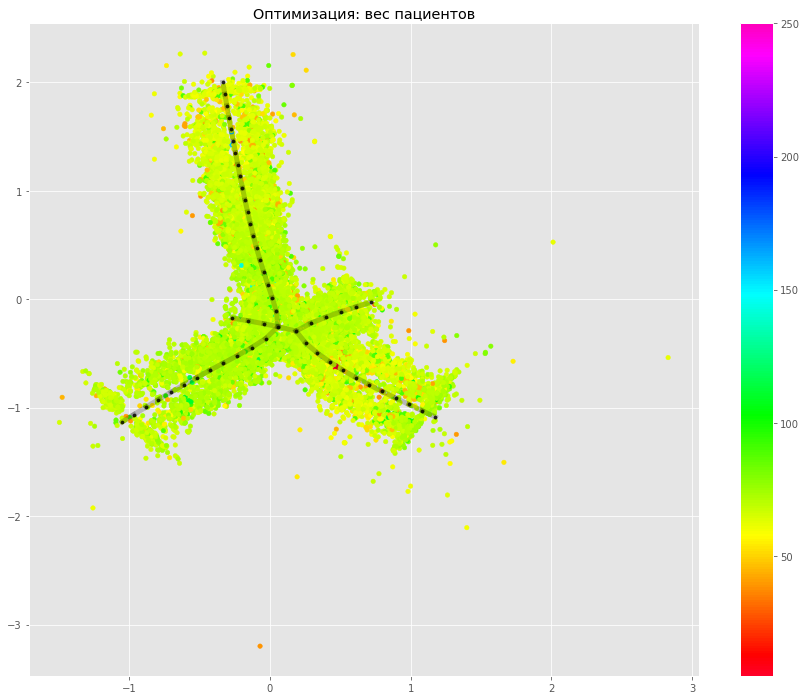

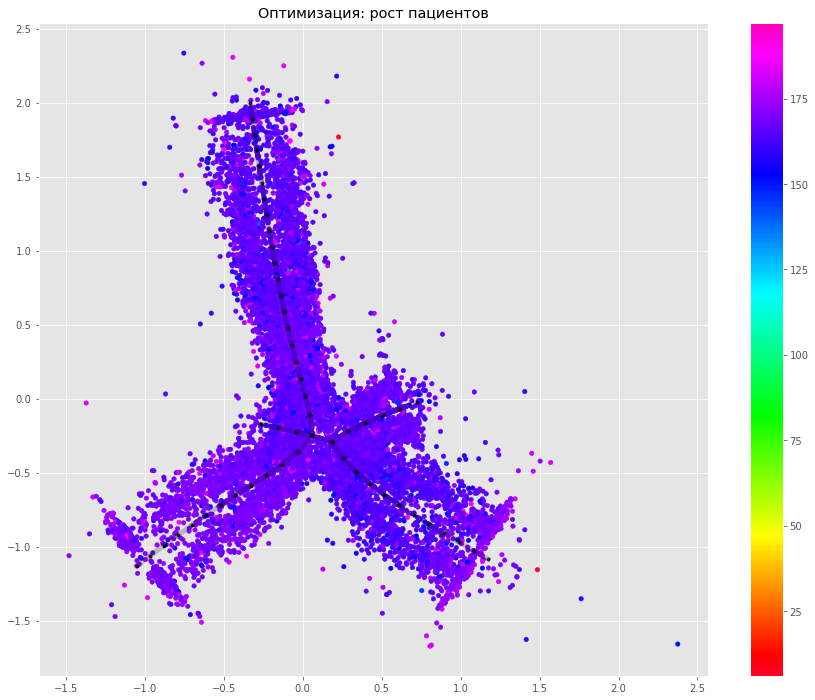

In [368]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='AGE', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: возраст пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='SEX', cmap='winter', add_color_bar=True)
plt.title("Оптимизация: пол пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='WEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: вес пациентов")
plt.show()

fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_orig_opt, components_opt, mnval_opt, 'k', variable_names,
                           Color_by_feature='HEIGHT', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: рост пациентов")
plt.show()

In [412]:
classes = []
for i in range(len(dataset_dropped)):
    for j, col in zip([0, 1, 2, 3], ['MI', 'STTC', 'CD', 'HYP']):
        if (dataset_dropped.at[i, col]):
            classes.append(col)

In [413]:
dataset_dropped

,ecg_id,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,...,V6_C_QT_INT_DEV,MI,STTC,CD,HYP,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB,Class
0,8.0,0.0,48.0,NaN,95.0,100.316667,12.131639,85.550000,2.744085,178.900000,...,2.690725,1.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0
1,22.0,1.0,17.0,NaN,53.0,88.981818,8.289819,85.393939,1.674637,164.712121,...,5.448481,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,1
2,26.0,0.0,56.0,NaN,NaN,90.082492,15.961563,97.666667,3.079953,152.022436,...,14.877276,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,1
3,28.0,0.0,56.0,NaN,NaN,83.306870,18.644523,90.172619,5.383836,124.888889,...,22.678306,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,1
4,30.0,0.0,25.0,NaN,83.0,104.335648,8.618019,112.518519,1.730862,212.740741,...,3.456966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,21827.0,1.0,79.0,NaN,NaN,65.711111,10.065820,115.335185,19.436315,186.168981,...,61.683381,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0
18294,21827.0,1.0,79.0,NaN,NaN,65.711111,10.065820,115.335185,19.436315,186.168981,...,61.683381,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1
18295,21828.0,1.0,79.0,NaN,NaN,64.097222,15.379986,110.725758,16.007926,184.752525,...,34.921399,1.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0
18296,21828.0,1.0,79.0,NaN,NaN,64.097222,15.379986,110.725758,16.007926,184.752525,...,34.921399,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,1


,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,ALL_C_T_DEV,...,V6_C_QT_INT_DEV,MI,STTC,CD,HYP,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB,Class
0,0.0,48.0,166.0,95.0,100.316667,12.131639,85.550000,2.744085,178.900000,12.340719,...,2.690725,1.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,MI
1,1.0,17.0,166.0,53.0,88.981818,8.289819,85.393939,1.674637,164.712121,10.860498,...,5.448481,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,STTC
2,0.0,56.0,166.0,70.0,90.082492,15.961563,97.666667,3.079953,152.022436,24.195624,...,14.877276,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,STTC
3,0.0,56.0,166.0,70.0,83.306870,18.644523,90.172619,5.383836,124.888889,23.532573,...,22.678306,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,STTC
4,0.0,25.0,166.0,83.0,104.335648,8.618019,112.518519,1.730862,212.740741,16.050332,...,3.456966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,HYP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,1.0,79.0,166.0,70.0,65.711111,10.065820,115.335185,19.436315,186.168981,47.835704,...,61.683381,1.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,MI
18294,1.0,79.0,166.0,70.0,65.711111,10.065820,115.335185,19.436315,186.168981,47.835704,...,61.683381,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,STTC
18295,1.0,79.0,166.0,70.0,64.097222,15.379986,110.725758,16.007926,184.752525,30.887792,...,34.921399,1.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,MI
18296,1.0,79.0,166.0,70.0,64.097222,15.379986,110.725758,16.007926,184.752525,30.887792,...,34.921399,0.0,1.0,0.0,0.0,0.0,100.0,0.0,0.0,STTC


In [405]:
dataset_dropped['Class'].value_counts()

0    5486
1    5250
2    4907
3    2655
Name: Class, dtype: int64

In [406]:
variable_names_classes = [str(s) for s in dataset_dropped.columns[1:]]
X_classes_orig_imputer = dataset_dropped.drop('ecg_id', axis=1)
X_classes_orig_imputer = SimpleImputer(strategy="median").fit_transform(X_classes_orig_imputer)
X_classes_orig_imputer

array([[  0.,  48., 166., ...,   0.,   0.,   0.],
       [  1.,  17., 166., ...,   0.,   0.,   1.],
       [  0.,  56., 166., ...,   0.,   0.,   1.],
       ...,
       [  1.,  79., 166., ...,   0.,   0.,   0.],
       [  1.,  79., 166., ...,   0.,   0.,   1.],
       [  1.,  69., 166., ..., 100.,   0.,   2.]])

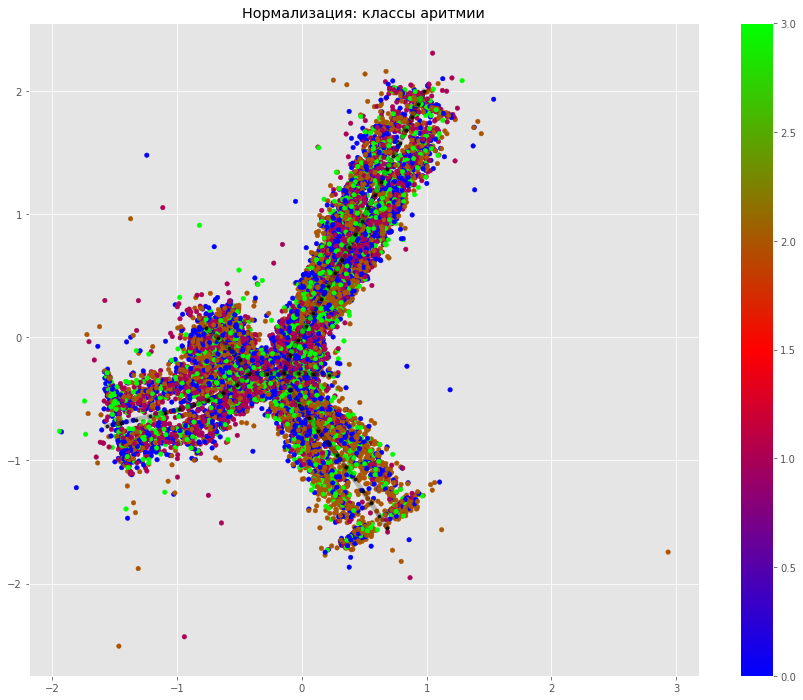

In [392]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_norm, X_pca_norm, X_classes_orig_imputer, components_norm, mnval_norm, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='brg', add_color_bar=True)
plt.title("Нормализация: классы аритмии")
plt.show()

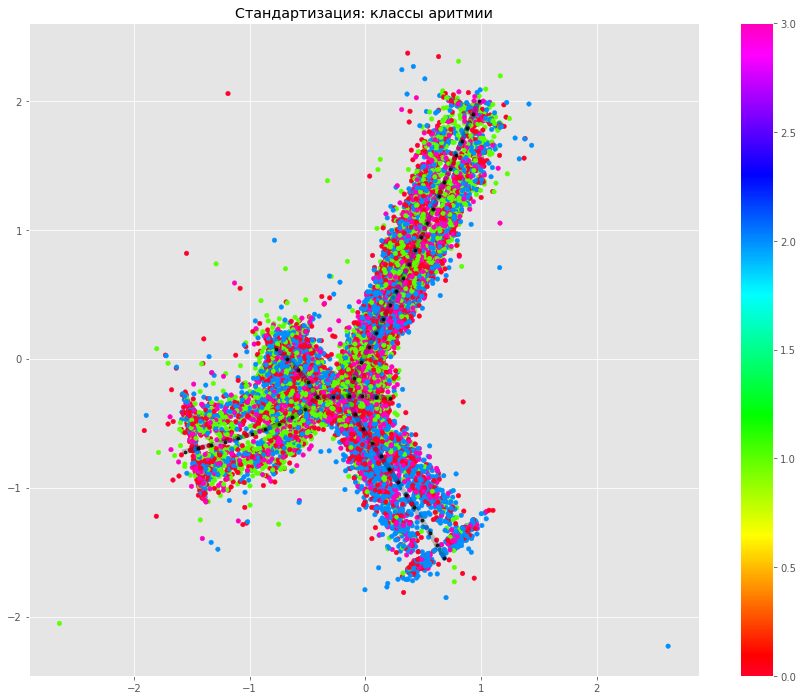

In [384]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_std, X_pca_std, X_classes_orig_imputer, components_std, mnval_std, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='gist_rainbow', add_color_bar=True)
plt.title("Стандартизация: классы аритмии")
plt.show()

In [385]:
dataframe_opt['Class'] = classes
dataframe_opt

,ecg_id,SEX,AGE,HEIGHT,WEIGHT,ALL_C_P_AV,ALL_C_P_DEV,ALL_C_QRS_AV,ALL_C_QRS_DEV,ALL_C_T_AV,...,V6_C_QT_INT_DEV,MI,STTC,CD,HYP,MI_PROB,STTC_PROB,CD_PROB,HYP_PROB,Class
0,8.0,0,48.0,167.167383,95.000000,100.316667,12.131639,85.550000,2.744085,178.900000,...,2.690725,1,0,0,0,35,0,0,0,0
1,22.0,1,17.0,166.011617,53.000000,88.981818,8.289819,85.393939,1.674637,164.712121,...,5.448481,0,1,0,0,0,100,0,0,1
2,26.0,0,56.0,166.480793,68.859750,90.082492,15.961563,97.666667,3.079953,152.022436,...,14.877276,0,1,0,0,0,100,0,0,1
3,28.0,0,56.0,162.558130,65.866766,83.306870,18.644523,90.172619,5.383836,124.888889,...,22.678306,0,1,0,0,0,100,0,0,1
4,30.0,0,25.0,171.042685,83.000000,104.335648,8.618019,112.518519,1.730862,212.740741,...,3.456966,0,0,0,1,0,0,0,100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18293,21827.0,1,79.0,168.489868,68.563073,65.711111,10.065820,115.335185,19.436315,186.168981,...,61.683381,1,0,0,0,100,0,0,0,0
18294,21827.0,1,79.0,168.461929,68.542045,65.711111,10.065820,115.335185,19.436315,186.168981,...,61.683381,0,1,0,0,0,50,0,0,1
18295,21828.0,1,79.0,168.172517,68.757910,64.097222,15.379986,110.725758,16.007926,184.752525,...,34.921399,1,0,0,0,80,0,0,0,0
18296,21828.0,1,79.0,168.143569,68.736133,64.097222,15.379986,110.725758,16.007926,184.752525,...,34.921399,0,1,0,0,0,100,0,0,1


In [386]:
X_classes_orig_opt = dataframe_opt.drop('ecg_id', axis=1)
X_classes_orig_opt = SimpleImputer(strategy="median").fit_transform(X_classes_orig_opt)

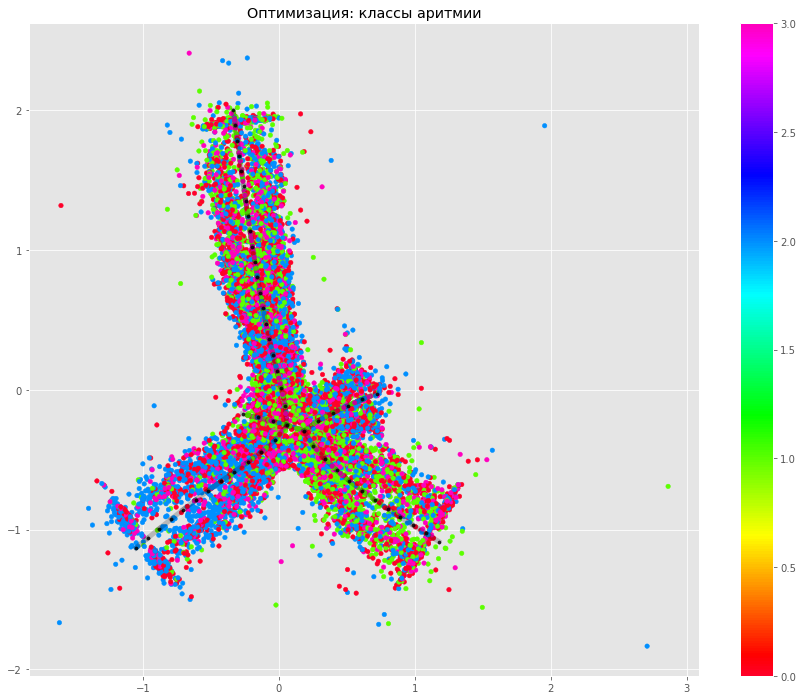

In [387]:
fig = plt.figure(figsize=figsize)
# tree_extended, X, X_original, v, mean_val, 'k', variable_names
visualize_eltree_with_data(tree_opt, X_pca_opt, X_classes_orig_opt, components_opt, mnval_opt, 'k', variable_names_classes,
                           Color_by_feature='Class', cmap='gist_rainbow', add_color_bar=True)
plt.title("Оптимизация: классы аритмии")
plt.show()